## <center>Case study on Unsupervised Learning

### 1.1) Reading the dataset to python environment

In [1]:
import pandas as pd
wine = pd.read_csv('Wine.csv')

In [2]:
# checking the overall structure of the dataset
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


The dataset consist of 178 rows and 13 columns

### 1.2) Preprocessing

In [3]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

All variables are either int/float type

In [4]:
# checking for null values in the data set
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values present in the data set

In [5]:
#Checking outliers 

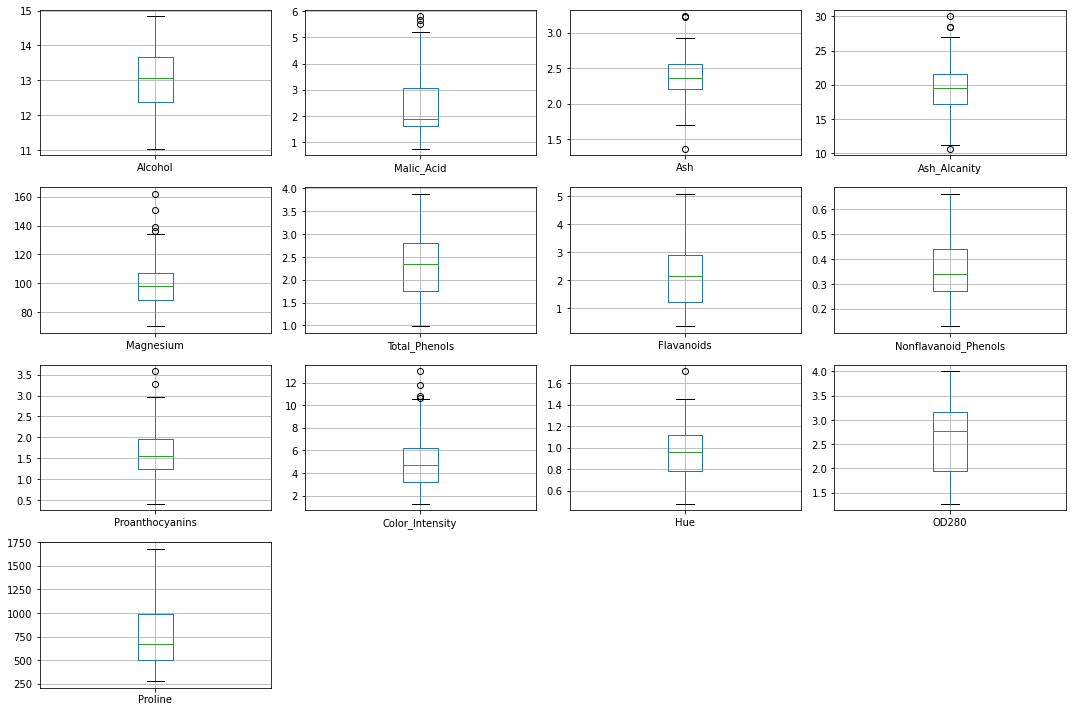

In [6]:
import matplotlib.pyplot as plt
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in wine.columns:
    plt.subplot(a, b, c)
    wine.boxplot([i])
    c = c + 1

plt.tight_layout()
plt.show()

Outliers are present in Malic Acid,Ash,Ash alcanity,Magnesium ,Proanthocyanins,Color_intensity,Hue columns

With respect to each column ,either the outliers are very small in number or the total range is limited.

Most probably outliers are natural part of the population.So leaving it as it is.

In [7]:
#Principal component analysis

<AxesSubplot:>

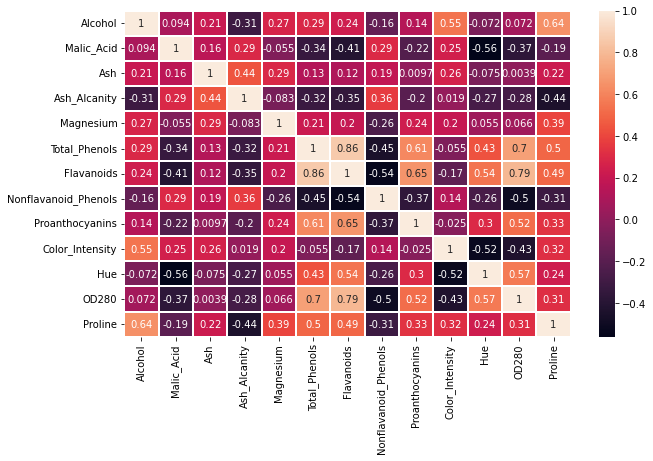

In [8]:
#checking correlation between the features
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data=wine.corr(),annot=True,linewidth=0.2)

Several features are highly correlated ,so doing a principal component anlysis for extracting the important features.

In [9]:
wine1=wine.copy()
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() 
wine1_scaled = pd.DataFrame(scaler.fit_transform(wine1), columns=wine1.columns)
wine2_scaled=wine1_scaled.copy()
wine_graph=wine1_scaled.copy() # for plotting purpose only

In [10]:
#Doing principal component analysis

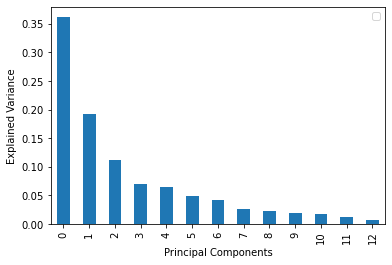

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
wine_pca = pd.DataFrame(pca.fit_transform(wine1_scaled))
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

First 3 principal components explains 66% of the variance in the dataset.,so we can replace the 13 original features (alcohol, malic acid, Ash, etc.) with the new 3 features having 66% of the information.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
wine1_pca = pd.DataFrame(pca.fit_transform(wine1_scaled))
wine_hca=wine1_pca.copy()
wine1_pca

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


### 2) Trying out different clustering models on the dataset and finding the optimum number of clusters

#### 2.1 ) K-means clustering

Trying out k_means clustering with different no.of clusters

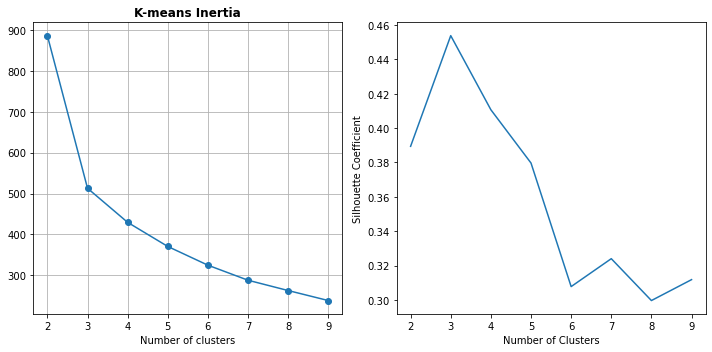

In [13]:
#Trying out k-means clustering with different no.of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette = []
inertia=[]
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(wine1_pca)
    score = silhouette_score(wine1_pca,kmeans.labels_)
    silhouette.append(score)
    inertia.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10),inertia,'-o')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

#plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.tight_layout()
plt.show()


From both elbow method and Silhouette coeffcient ,its optimal to choose number of clusters as 3.

#### 2.2) Heirachical Agglomertive clustering

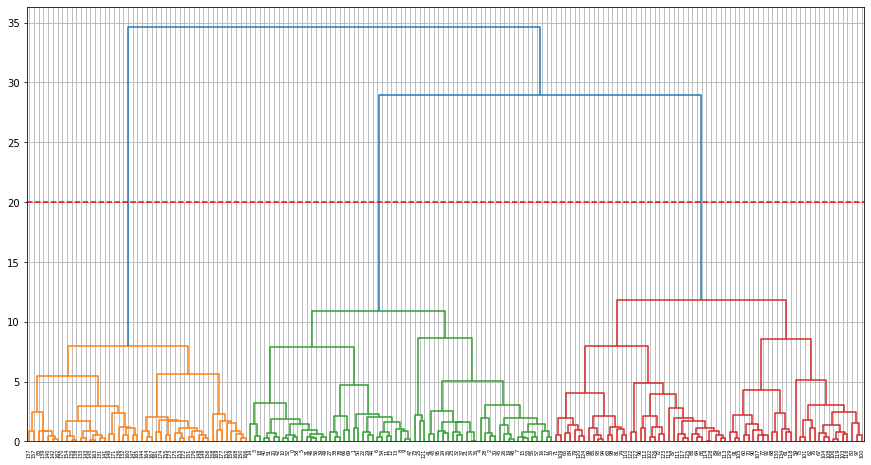

In [14]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(wine_hca,method='ward')
#plotting the dendrogram
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(20,0,5000,colors='r',linestyles='dashed' )
plt.grid(True)
plt.show()

Even though the optimum cluster from dendrogram analysis is 3,trying out agglomerative clustering with different number of clusters.

In [15]:
# Trying out HAC with different number of clusters and finding out the silhouette score

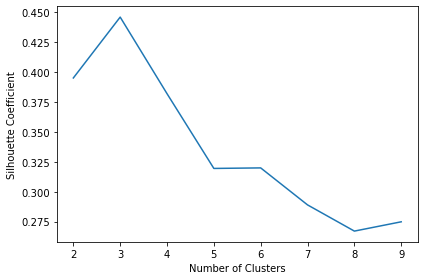

In [16]:
from sklearn.cluster import AgglomerativeClustering
silhouette2 = []
for k in range(2, 10):
    cluster=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    cluster.fit(wine_hca)
    score = silhouette_score(wine_hca,cluster.labels_)
    silhouette2.append(score)
plt.plot(range(2, 10), silhouette2)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.tight_layout()
plt.show()

Considering both Dendrogram and silhoutte coeffcient,its optimal to choose number of cluster=3

### 3)  Creating the model with the optimum number of clusters

#### 3.1)K_means clustering

In the previous step,it was inferred that optimum number of clusters for k_means algorithm is 3,so creating the model using this criteria.

In [22]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(wine1_pca) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### 3.2)Heirarchial Agglomerative clustering

In the previous step,it was inferred that optimum number of clusters for HAC algorithm is also 3,so creating the model using this criteria.

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(wine_hca)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

#### 3.3) Using k_means clustering to analyse the clusters

In [19]:
# Using first two principal components to visualise the clusters

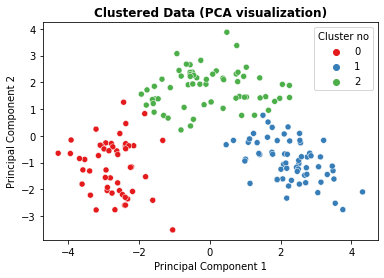

In [20]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(wine_graph)
df=pd.DataFrame(pca_2_result,columns=['pc1','pc2'])
df['Cluster no']=kmeans.labels_
sns.scatterplot(data=df,x='pc1',y='pc2', hue="Cluster no",palette="Set1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

In [21]:
wine2=wine.copy()
wine2['Cluster_no']=kmeans.labels_
wine2.groupby(['Cluster_no']).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster_no,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
